In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#loading the iris dataset
iris=load_iris()

In [ ]:
# converting loaded dataset into dataframe
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [ ]:
#Returning top rows of dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Adding TARGET column to dataframe
df['target']=iris.target

In [ ]:
# Assigning data and target to variables
x=df.drop('target',axis=1)
y=df['target']

In [ ]:
# Scaling the features
sc=StandardScaler()

x=sc.fit_transform(x)

In [ ]:
# sPLITTING the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)


In [ ]:
# BNuilding the LDA model
lda = LinearDiscriminantAnalysis(n_components=2)
lda

LinearDiscriminantAnalysis(n_components=2)

In [ ]:
#Perfoming LDA on data
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [ ]:
# Building the RandomForest classifier
model=RandomForestClassifier(max_depth=2,random_state=0)
model

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
#Training the Random forest model
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

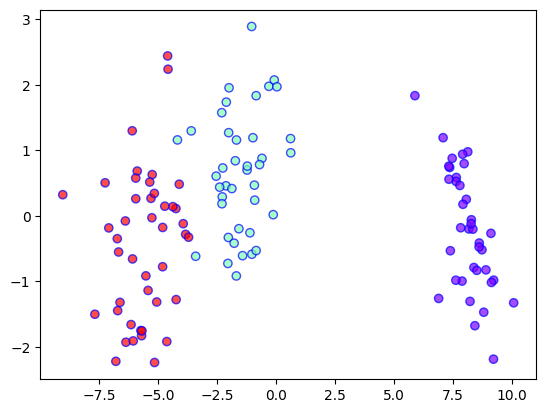

In [ ]:
# plot the scatterplot
plt.scatter(
    x_train[:, 0], x_train[:, 1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7, edgecolors='b'
)

In [ ]:
#Predicting the values
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
# Accuracy
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9666666666666667

In [ ]:
#Confusion matrix
confusion=confusion_matrix(y_test,y_pred)
confusion

array([[13,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  6]])